<a href="https://colab.research.google.com/github/SANTONLA/05-EJERCICIOS-PELICULAS/blob/main/iris_santon_prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTAMOS DATOS IRIS

In [ ]:
# @title
import pandas as pd
from sklearn.datasets import load_iris

# Carga el conjunto de datos Iris
data = load_iris()
X = data.data
y = data.target

# Convertir X y y en un DataFrame de pandas
df = pd.DataFrame(data=np.c_[X, y], columns=data.feature_names + ['target'])

# Muestra las primeras filas del DataFrame
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


# HACEMOS UN BREVE ANÁLISIS EDA

In [ ]:
# @title
df.shape

(150, 5)

In [ ]:
# @title
display(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


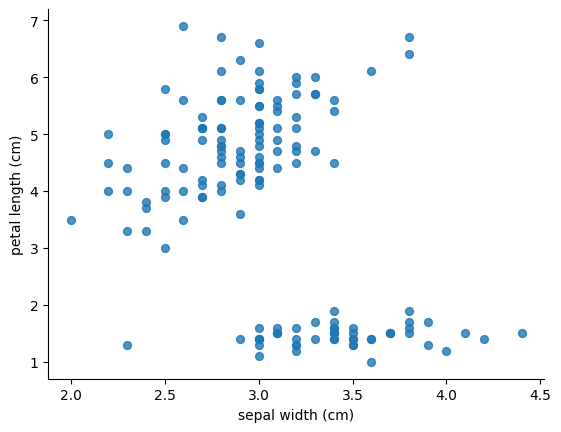

In [ ]:
# @title sepal width (cm) vs petal length (cm)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='sepal width (cm)', y='petal length (cm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# @title
# Utiliza value_counts() en la columna 'target' para contar los valores únicos
valores_diferentes = df['target'].value_counts()

# Muestra el resultado
print(valores_diferentes)



0.0    50
1.0    50
2.0    50
Name: target, dtype: int64


como vemos existen 3 clases. 0,1 y 2

In [ ]:
# @title
df.describe().T.style.background_gradient(cmap='Purples')

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.000000,5.843333,0.828066,4.300000,5.100000,5.800000,6.400000,7.900000
sepal width (cm),150.000000,3.057333,0.435866,2.000000,2.800000,3.000000,3.300000,4.400000
petal length (cm),150.000000,3.758000,1.765298,1.000000,1.600000,4.350000,5.100000,6.900000
petal width (cm),150.000000,1.199333,0.762238,0.100000,0.300000,1.300000,1.800000,2.500000
target,150.000000,1.000000,0.819232,0.000000,0.000000,1.000000,2.000000,2.000000


In [ ]:
# @title
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


# GRÁFICOS DESCRIPTIVOS

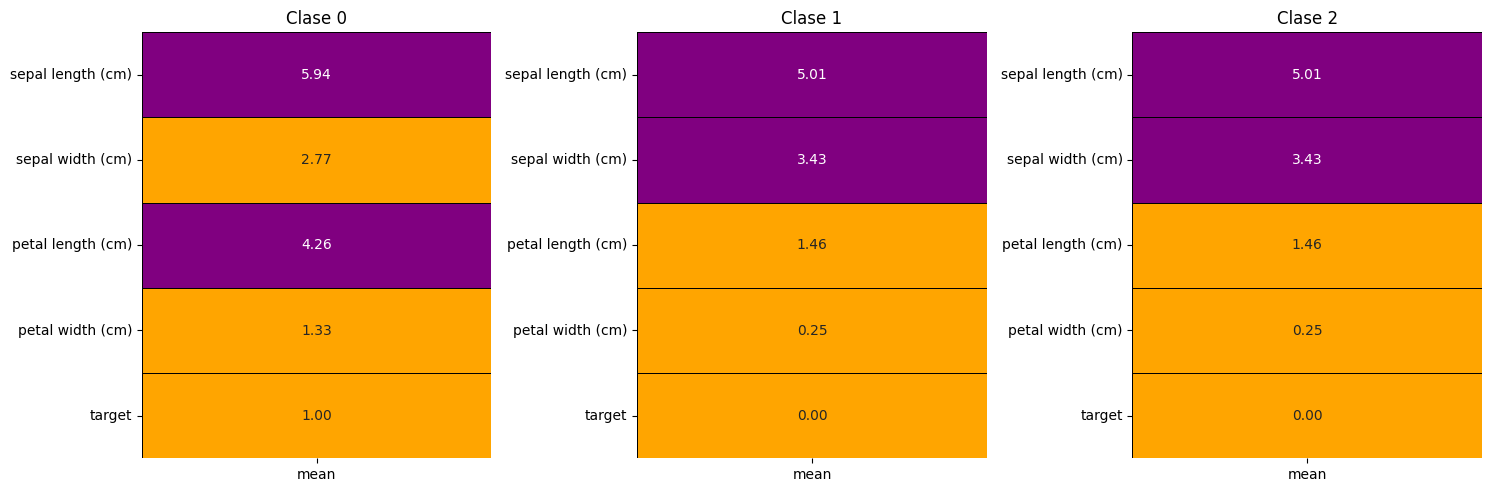

In [ ]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una copia profunda del DataFrame
df_copy = df.copy(deep=True)

# Filtrar los datos correctamente
target = df_copy[df_copy['target'] == 1].describe().T
not_target = df_copy[df_copy['target'] == 0].describe().T

# Cambiar el color rojo a morado y naranja
colors = ['#FFA500', '#800080']
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Gráfico para la clase 0
sns.heatmap(target[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f', ax=ax[0])
ax[0].set_title('Clase 0')

# Gráfico para la clase 1
sns.heatmap(not_target[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f', ax=ax[1])
ax[1].set_title('Clase 1')

# Gráfico para la clase 2
sns.heatmap(not_target[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f', ax=ax[2])
ax[2].set_title('Clase 2')

plt.tight_layout(pad=1.0)
plt.show()

# VISUALIZAMOS VARIABLE OBJETIVO

<ipython-input-75-521961d1019b>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='target', data=df_copy, palette=colors, edgecolor='black')
<ipython-input-75-521961d1019b>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0', '1', '2'])


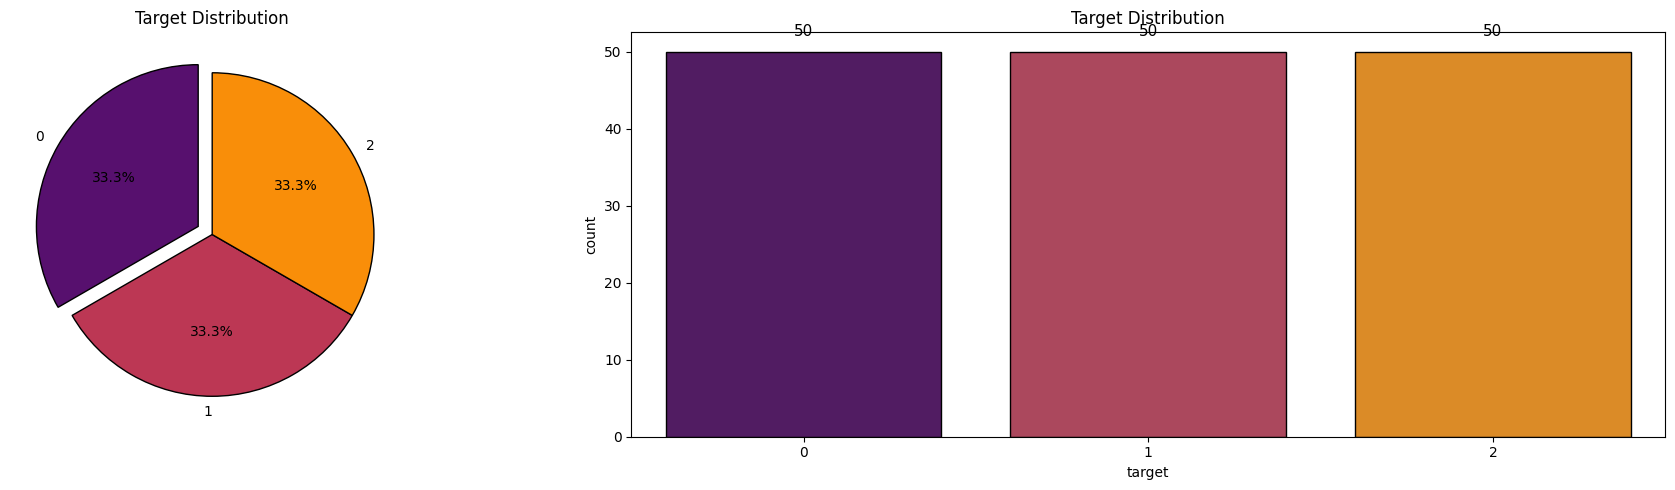

In [ ]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# Selecciona un esquema de color similar a "inferno" de Seaborn
colors = sns.color_palette("inferno", 3)

cant = list(df['target'].value_counts())
circle = [cant[0] / sum(cant) * 100, cant[1] / sum(cant) * 100, cant[2] / sum(cant) * 100]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Primer gráfico - Gráfico de pastel
plt.subplot(1, 2, 1)
plt.pie(circle, labels=['0', '1', '2'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0, 0), colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Target Distribution')

# Segundo gráfico - Gráfico de barras
plt.subplot(1, 2, 2)
ax = sns.countplot(x='target', data=df_copy, palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, int(rect.get_height()), horizontalalignment='center', fontsize=11)
ax.set_xticklabels(['0', '1', '2'])

plt.title('Target Distribution')

plt.tight_layout()
plt.show()

# MATRIZ DE CORRELACION

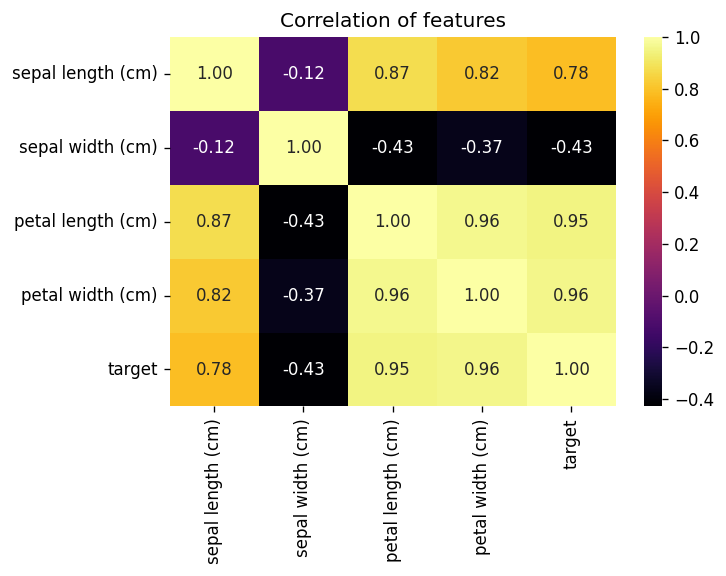

In [ ]:
# @title
plt.figure(figsize=(6,4), dpi= 120)
plt.title("Correlation of features")
sns.heatmap(df_copy.corr(), cmap='inferno', annot=True, fmt='.2f');

# ELEGIMOS Y ENTRENAMOS MODELO DE CLASIFICACIÓN

In [ ]:
# @title
# Importa las bibliotecas necesarias

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea un modelo de árbol de decisión multiclase
model = DecisionTreeClassifier()

# Entrena el modelo en los datos de entrenamiento
model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [ ]:
# @title
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


# CALCULAMOS LA PRECISIÓN DEL MODELO

In [ ]:
# @title
# Calcula la precisión de las predicciones
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

# Muestra el informe de clasificación detallado
print("Informe de Clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 100.00%
Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# GENERAMOS INFORME DE CLASIFICACIÓN

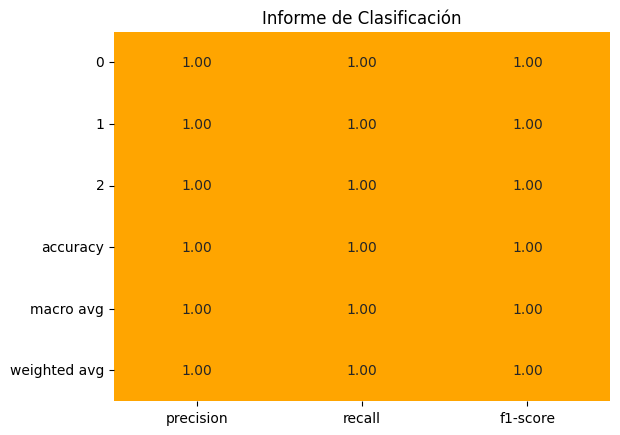

In [ ]:
# @title
# Genera el informe de clasificación con colores inferno usando seaborn
report = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap=['orange', 'purple'], fmt='.2f', cbar=False)
plt.title('Informe de Clasificación')
plt.show()